# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Jon\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


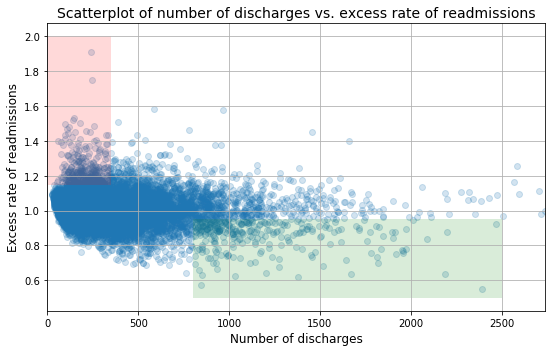

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A. Critique of the provided analysis

Critique of Section A: The first comment, that frequency of readmissions trends downwards with number of discharges, is not supported mathematically.  There is not even a best fit line on his scatter plot to support this. The graphic that he references in the next two points is not useful for a few reasons.  The green and red zones are placed almost at random, and there is no statistical basis for their placement.  On the scatter plot, how many points exists directly above the green zone compared to how many exist within the green zone? It is difficult to tell from the graphic alone, but by the eye test the difference doesn't appear to be huge.  Similarly with the red zone it is difficult to tell how many points lie within that zone because they are so closely grouped together. And how many lie to the right compared to how many lie within that zone? And in addition the red zone is largely empty! For the graphic as a whole, there is a large region in the center that is simply solid and full of points.  Exactly how many points are there in that cluster compared to the outer area's of the graph? That would be essential information.


Critique of Section B: There is no reason given to choose hospitals with less than 100 or more than 1000 discharges.  How many hospitals are there in those groups? How many are inbetween? The readmission rate of just these two groups is not going to show anything about the greater trend happening between number of discharges and  the readmission rate of hospitals.

Critique of Section C: There is no statistical analysis done to establish a correlation between number of discharges and readmission rate.  The statement is totally unfounded.  Also, the assumption that smaller hospitals may be lacking resources comes from nowhere at all.  There would need to be a lot more information than that given in the dataframe to determine if the hospitals have enough resources or not.

Critique of Section D: The determination that hospitals with a capacity of less than 300 "should be required to demonstrate upgraded resource allocation for quality care to continue operation" makes little sense.  The number 300 is pulled from thin air (in section B he looks at hospitals with a capacity smaller than 100) and again resource allocation is never even approached in his analysis.  For those hospitals of greater capacity there is no suggestion made at all.  His suggestion to incentivize consolidation of hospitals also isn't something the analysis supports.  The potential effects of consiolidating hospitals is definitely something that would need to be looked into before making that recommendation.  

Finally, a note on the data in general.  The readmission ratio is made based off of "predicted" or "expected" readmissions.  When comparing the total number of discharges to the readmission ratio, we have to consider that the "expected" number of readmissions may simply be off for certain hospitals.  If that prediction of readmissions were off for a group of hospitals that could really effect the ratio of readmissions to expected readmissions.

## B.

### 1. Hypothesis test: H0: All hospital excess readmission ratio's will be uneffected by the number of discharges of the hospital. HA:Hospital excess readmission ratio will change based on the number of discharges.

In [6]:
higher_ratio_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] >= 1.0]
lower_ratio_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] < 1.0]

### 2. Solve for p.

In [7]:
from scipy import stats

stats.ttest_ind(higher_ratio_df['Number of Discharges'],lower_ratio_df['Number of Discharges'])

Ttest_indResult(statistic=-5.3961222591733966, pvalue=6.9448353196553397e-08)

stats.ttest_ind() used above tests the null hypothesis that 2 independent samples have identical average (expected) values. A P value of effectively 0 allows us to reject our null hypothesis. 

### 3.Statistical signifigance for alpha=.01

Because our p value is so low (much lower than .01, alpha in this case) we can still reject our null hypothesis even with 99% confidence required. 

### 4. Statistical vs Practical Signifigance.

Simply put, statistcal signifigance may demonstrate a difference in the numbers, but the numbers won't always tell the whole story.  In this case we are able to find some correlation's between discharges and readmission ratio, but there is a whole lot of information we don't have on these facilities.  There are a lot of other factors effecting the readmission rates of these hospitals. Because of that the practical signifigance of our analysis is low, the study just isn't that useful. In order to make serious recommendations on how to reduce hospital readmissions, there needs to be a lot more studying done of these facilities, not just a monitoring of their discharge numbers.

### 5. The scatter plot above

Advantages: Easy to digest and understand what the data is looking like. Simple.

Disadvantages: I will copy my response from Part A, critique of the analysis section A.

The graphic that he references in the next two points is not useful for a few reasons. The green and red zones are placed almost at random, and there is no statistical basis for their placement. On the scatter plot, how many points exists directly above the green zone compared to how many exist within the green zone? It is difficult to tell from the graphic alone, but by the eye test the difference doesn't appear to be huge. Similarly with the red zone it is difficult to tell how many points lie within that zone because they are so closely grouped together. And how many lie to the right compared to how many lie within that zone? And in addition the red zone is largely empty! For the graphic as a whole, there is a large region in the center that is simply solid and full of points. Exactly how many points are there in that cluster compared to the outer area's of the graph? That would be essential information.

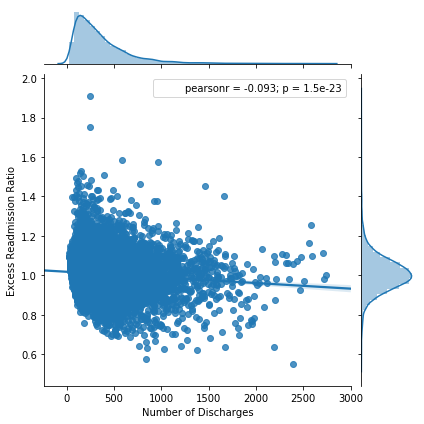

In [12]:
import seaborn as sns

sns.jointplot(clean_hospital_read_df['Number of Discharges'][:-3],clean_hospital_read_df['Excess Readmission Ratio'],kind='reg')
plt.show()